In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display_img(img, cmap='gray'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [27]:
img = cv2.imread('Images/1.png')

In [32]:
bordersize = 50
img_pad = cv2.copyMakeBorder(
    img,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[255, 255, 255]
)

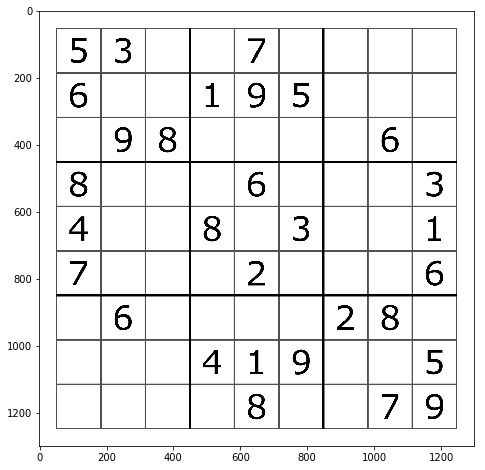

In [33]:
display_img(img_pad)

In [34]:
img_gray = cv2.cvtColor(img_pad, cv2.COLOR_BGR2GRAY)

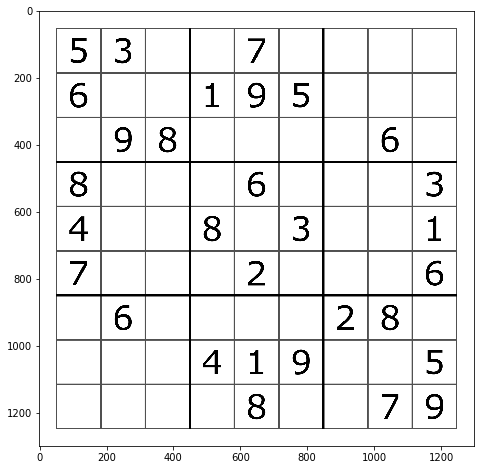

In [35]:
display_img(img_gray,'gray')

In [36]:
ret, img_thresh = cv2.threshold(img_gray,230,255,cv2.THRESH_BINARY)

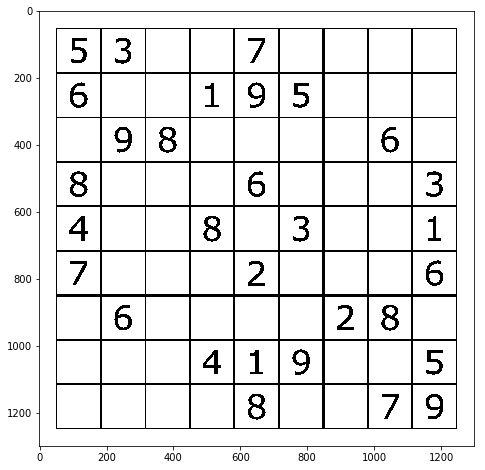

In [37]:
display_img(img_thresh, cmap='gray')

# Contours

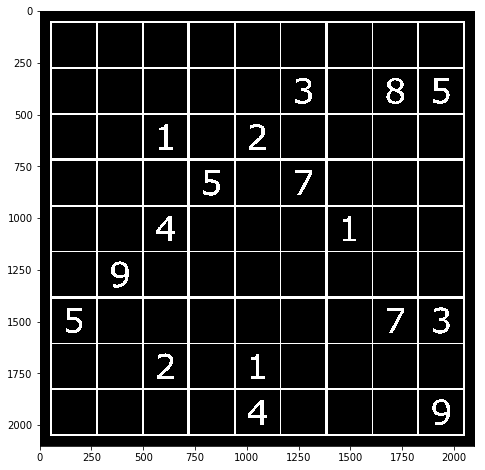

In [1098]:
img_inv = cv2.bitwise_not(img_thresh)
display_img(img_inv)

In [1099]:
image, contours, hierarchy = cv2.findContours(img_inv, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [1100]:
hierarchy

array([[[  2,  -1,   1,  -1],
        [ -1,  -1,  -1,   0],
        [  5,   0,   3,  -1],
        [  4,  -1,  -1,   2],
        [ -1,   3,  -1,   2],
        [  6,   2,  -1,  -1],
        [  7,   5,  -1,  -1],
        [  8,   6,  -1,  -1],
        [  9,   7,  -1,  -1],
        [ 10,   8,  -1,  -1],
        [ 12,   9,  11,  -1],
        [ -1,  -1,  -1,  10],
        [ 13,  10,  -1,  -1],
        [ 15,  12,  14,  -1],
        [ -1,  -1,  -1,  13],
        [ 16,  13,  -1,  -1],
        [ 17,  15,  -1,  -1],
        [ 18,  16,  -1,  -1],
        [ 19,  17,  -1,  -1],
        [ 20,  18,  -1,  -1],
        [ 21,  19,  -1,  -1],
        [ 24,  20,  22,  -1],
        [ 23,  -1,  -1,  21],
        [ -1,  22,  -1,  21],
        [ -1,  21,  25,  -1],
        [ 26,  -1,  -1,  24],
        [ 27,  25,  -1,  24],
        [ 28,  26,  -1,  24],
        [ 29,  27,  -1,  24],
        [ 30,  28,  -1,  24],
        [ 31,  29,  -1,  24],
        [ 32,  30,  -1,  24],
        [ 33,  31,  -1,  24],
        [ 

In [1101]:
# Set up empty array
img_cont = np.zeros_like(img_pad)
img_cont = img_pad.copy()

# For every entry in contours
for i in range(len(contours)):
    
    area = cv2.contourArea(contours[i])
    if area > 4000:
#     # last column in the array is -1 if an external contour (no contours inside of it)
#     if hierarchy[0][i][3] == 52:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(img_cont, contours, i, (0,255,0), 10)

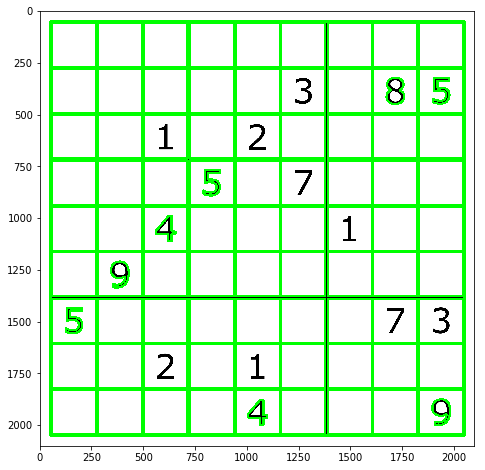

In [1102]:
display_img(img_cont,cmap=None)

## Rather than find grid, infer grid

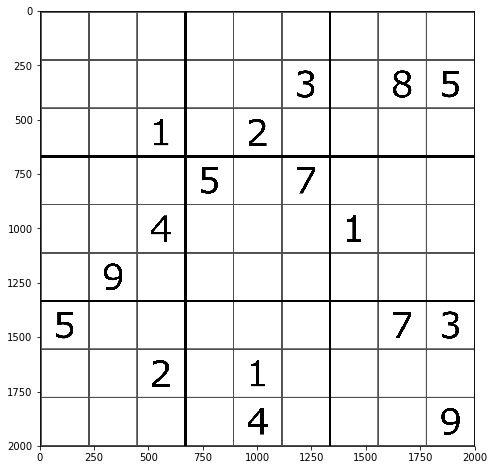

In [1103]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(img_gray)

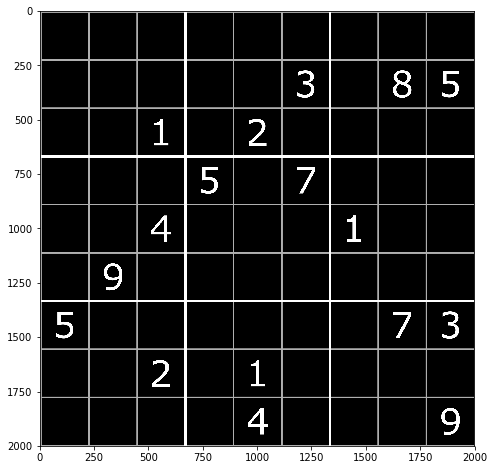

In [1104]:
img_inv = cv2.bitwise_not(img_gray)
display_img(img_inv)

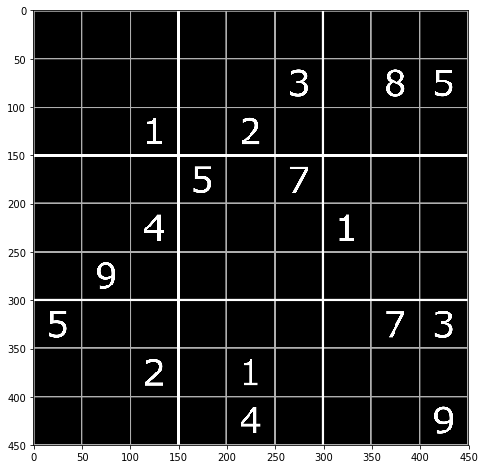

In [1105]:
img_small = cv2.resize(img_inv,(450,450))
display_img(img_small)

In [1106]:
# ret, img_thresh = cv2.threshold(img_small,230,255,cv2.THRESH_BINARY)
# display_img(img_thresh)

In [1107]:
bb_w = int(img_small.shape[1]/9)
bb_h = int(img_small.shape[0]/9)
bb_th = int(bb_w/10)
bb_w, bb_h, bb_th

(50, 50, 5)

In [1108]:
digits.shape

(9, 9, 28, 28)

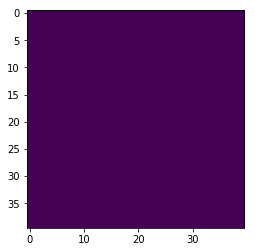

In [1109]:
dig_eg = img_small[bb_th: bb_h - bb_th, bb_th: bb_w - bb_th]
plt.imshow(dig_eg)

In [1110]:
is_digit = np.zeros((9,9))
for row in range(digits.shape[0]):
    for col in range(digits.shape[1]):
        img_dig = img_small[row*bb_h + bb_th: (row+1)*bb_h - bb_th, col*bb_w + bb_th: (col+1)*bb_w - bb_th]
        print(img_dig.max(), img_dig.min())  
        digits[row,col] = cv2.resize(img_dig,(28,28))
        if img_dig.max()>0:
            is_digit[row,col] = 1

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
255 0
0 0
255 0
255 0
0 0
0 0
255 0
0 0
255 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
255 0
0 0
255 0
0 0
0 0
0 0
0 0
0 0
255 0
0 0
0 0
0 0
255 0
0 0
0 0
0 0
255 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
255 0
0 0
0 0
0 0
0 0
0 0
0 0
255 0
255 0
0 0
0 0
255 0
0 0
255 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
255 0
0 0
0 0
0 0
255 0


In [1111]:
digits[0,0].shape
# is_digit

(28, 28)

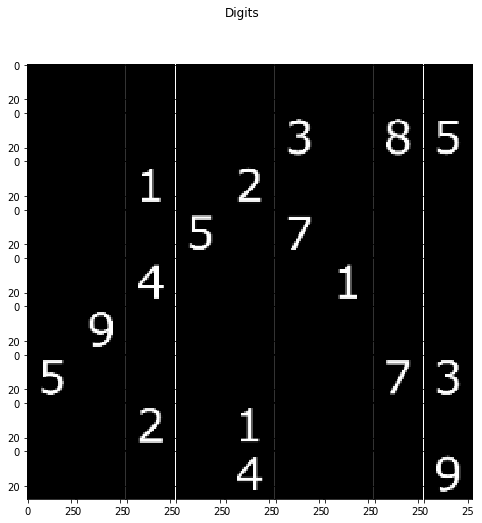

In [1112]:
fig, axs = plt.subplots(9,9, figsize=(8,8), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle('Digits')
for row in range(digits.shape[0]):
    for col in range(digits.shape[1]):
        axs[row,col].imshow(digits[row,col],cmap='gray')
    

In [1113]:
# Load model
from keras.models import load_model
model = load_model('MNIST_Model.h5')

In [1114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               102528    
__________

In [1115]:
digits_flat = digits.reshape(81,28,28)

In [1116]:
digits_test = np.array([digits_flat[i]/255 for i,val in enumerate(is_digit.flat) if val])

In [1117]:
digits_test.shape

(17, 28, 28)

In [1118]:
digits_test = digits_test.reshape(digits_test.shape[0],digits_test.shape[1],digits_test.shape[2],1)
digits_test.shape

(17, 28, 28, 1)

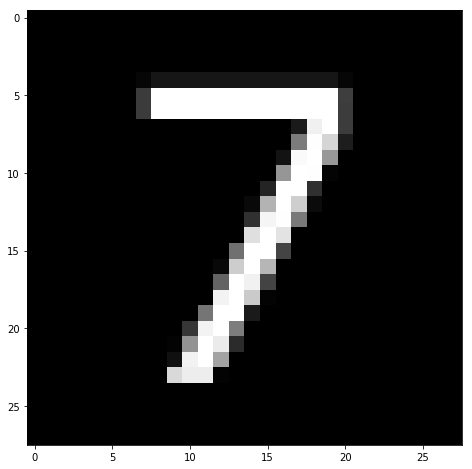

In [1119]:
display_img(digits_test[6].reshape(28,28))

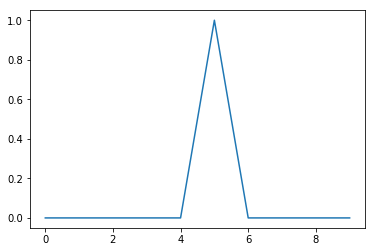

In [1120]:
dig_confidence = model.predict(digits_test)
plt.plot(dig_confidence[5])

In [1121]:
dig_predictions = model.predict_classes(digits_test)
dig_predictions

array([3, 8, 5, 1, 2, 5, 7, 4, 1, 9, 5, 7, 3, 2, 1, 4, 9], dtype=int64)

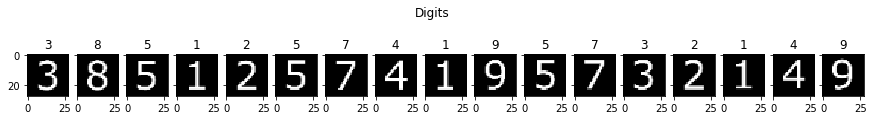

In [1122]:
fig, axs = plt.subplots(1,dig_predictions.shape[0], figsize=(15,2), sharey='row')
fig.suptitle('Digits')
for row in range(digits_test.shape[0]):
    axs[row].imshow(digits_test[row].reshape(28,28),cmap='gray')
    axs[row].set_title(str(dig_predictions[row]))

#### It correctly identified all of the digits. Yay!!!

In [1123]:
sudoku_board = np.zeros((9,9),dtype=np.uint8)

In [1124]:
sudoku_board[is_digit==1] = dig_predictions

In [1125]:
sudoku_board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 8, 5],
       [0, 0, 1, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 7, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 1, 0, 0],
       [0, 9, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0, 0, 7, 3],
       [0, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 9]], dtype=uint8)

In [1126]:
def show_board(sudoku_board):
    for row in range(9):
        for col in range(9):
            if (col)%3==0 and col!=0:
                print(" | ",end="")
            
            if sudoku_board[row,col]!=0:
                print(" "+str(sudoku_board[row,col])+" ",end='')
            else:
                print(" # ",end='')
        print()
        if(row+1)%3==0 and row!=8:
            print("-"*32,end='')
            print()

In [1127]:
show_board(sudoku_board)

 #  #  #  |  #  #  #  |  #  #  # 
 #  #  #  |  #  #  3  |  #  8  5 
 #  #  1  |  #  2  #  |  #  #  # 
--------------------------------
 #  #  #  |  5  #  7  |  #  #  # 
 #  #  4  |  #  #  #  |  1  #  # 
 #  9  #  |  #  #  #  |  #  #  # 
--------------------------------
 5  #  #  |  #  #  #  |  #  7  3 
 #  #  2  |  #  1  #  |  #  #  # 
 #  #  #  |  #  4  #  |  #  #  9 


# Solve Puzzle

In [1128]:
def solve(board):
    find = find_empty(board)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if is_valid(board, i, (row, col)):
            board[row][col] = i

            if solve(board):
                return True

            board[row][col] = 0

    return False

def is_valid(board, num, pos):
    # Check row
    for i in range(len(board[0])):
        if board[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(board)):
        if board[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if board[i][j] == num and (i,j) != pos:
                return False

    return True

def find_empty(board):
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 0:
                return (i, j)  # row, col

    return None

In [ ]:
solved_board = sudoku_board.copy()
solved_status = solve(solved_board)
if(solved_status):
    print("Solution found!")
else:
    print("No solution found...")

In [ ]:
show_board(solved_board)

# Add solution to original image

In [ ]:
img_solved = img_small.copy()
# img_solved = img_solved.resize(342,342)

In [ ]:
display_img(img_solved)

In [ ]:
solved_board.shape

In [ ]:
bb_w = int(img_solved.shape[1]/9)
bb_h = int(img_solved.shape[0]/9)
bb_th = int(bb_w/10)
dig_resize = img_solved[bb_th: bb_h - bb_th, bb_w + bb_th: bb_w - bb_th].shape[0]
bb_w, bb_h, bb_th, dig_resize

In [ ]:
img_path = "Images/digits/"
for row in range(solved_board.shape[0]):
    for col in range(solved_board.shape[1]):
        if not is_digit[row,col]:
            insert_img = cv2.imread(img_path+str(solved_board[row,col])+".jpg",0)
            img_solved[row*bb_h + bb_th: (row+1)*bb_h - bb_th, col*bb_w + bb_th: (col+1)*bb_w - bb_th] = cv2.resize(insert_img, (dig_resize,dig_resize))
        
    

In [ ]:
img_solved = cv2.bitwise_not(img_solved)
display_img(img_solved)

## SOLVED!